## 4.1 数据预处理的种类
- 缺失值处理
- 标准化
- 规范化   
针对单个样本，将每个样本缩放到单位范数
- 稀疏化
通过只存储和处理非零元素，从而大幅度降低存储空间需求及计算复杂度
- 特征编码
- 特征提取

## 4.2 缺失值处理
- 处理
    - 插补
    - 删除
- 不处理

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer  # 处理缺失值函数

# 指定缺失值参数和补全方法
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant')
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  # 最高频数

X = [[13, 22], [5, 3],[7, np.nan], [np.nan, 5], [3, 7]]
print(X)

imp_mean.fit(X)
imp_median.fit(X)
imp_constant.fit(X)
imp_most_frequent.fit(X)

print('均值法补全结果：')
print(imp_mean.transform(X))
print('中位数法补全结果：')
print(imp_median.transform(X))
print('常数法补全结果：')
print(imp_constant.transform(X))
print('最高频数法补全结果：')
print(imp_most_frequent.transform(X))


[[13, 22], [5, 3], [7, nan], [nan, 5], [3, 7]]
均值法补全结果：
[[13.   22.  ]
 [ 5.    3.  ]
 [ 7.    9.25]
 [ 7.    5.  ]
 [ 3.    7.  ]]
中位数法补全结果：
[[13. 22.]
 [ 5.  3.]
 [ 7.  6.]
 [ 6.  5.]
 [ 3.  7.]]
常数法补全结果：
[[13. 22.]
 [ 5.  3.]
 [ 7.  0.]
 [ 0.  5.]
 [ 3.  7.]]
最高频数法补全结果：
[[13. 22.]
 [ 5.  3.]
 [ 7.  3.]
 [ 3.  5.]
 [ 3.  7.]]


## 4.3 规范化
### 4.3.1 缩放规范化
去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或者量级的指标进行比较和加权。
- 最小值-最大值缩放：取值范围为0~1
- 最大绝对值缩放：取值范围为-1~1
- 特定范围缩放：取值范围为a~b

In [7]:
import numpy as np
from sklearn import preprocessing

X = np.array([[3,-2,2], [2,0,0], [-1,1,3]])
print(X)

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
max_abs_scaler = preprocessing.MaxAbsScaler()
X_maxabs = max_abs_scaler.fit_transform(X)
a_b_scaler = preprocessing.MinMaxScaler(feature_range=(-2, 6))
X_a_b = a_b_scaler.fit_transform(X)

print('最小值-最大值缩放规范化结果为：')
print(X_minmax)
print('最大值-绝对值缩放规范化结果为：')
print(X_maxabs)
print('特定范围缩放规范化结果为：')
print(X_a_b)

[[ 3 -2  2]
 [ 2  0  0]
 [-1  1  3]]
最小值-最大值缩放规范化结果为：
[[1.         0.         0.66666667]
 [0.75       0.66666667 0.        ]
 [0.         1.         1.        ]]
最大值-绝对值缩放规范化结果为：
[[ 1.         -1.          0.66666667]
 [ 0.66666667  0.          0.        ]
 [-0.33333333  0.5         1.        ]]
特定范围缩放规范化结果为：
[[ 6.         -2.          3.33333333]
 [ 4.          3.33333333 -2.        ]
 [-2.          6.          6.        ]]


### 4.3.2 标准化
对样本的每个特征分别进行计算使其满足标准正态分布

In [8]:
import numpy as np
from sklearn import preprocessing

X = np.array([[3,-2,2], [2,0,0], [-1,1,3]])
print(X)

standard_scaler = preprocessing.StandardScaler()
X_standard = standard_scaler.fit_transform(X)
print(X_standard)

[[ 3 -2  2]
 [ 2  0  0]
 [-1  1  3]]
[[ 0.98058068 -1.33630621  0.26726124]
 [ 0.39223227  0.26726124 -1.33630621]
 [-1.37281295  1.06904497  1.06904497]]


### 4.3.3 范数规范化
- 范数（Norm）
- 范数是一个函数，其为向量空间内所有向量赋予非零的正长度或者大小。
- 范数是强化了的距离概念，在定义上比距离多一条数乘的运算规则
- 向量法范数表示原有集合的大小；矩阵的范数表示这个变化过程的大小的一个度量。

1. 范数L0：用于度量向量中非零元素的个数
2. 范数L1：表示向量中元素的绝对值之和
3. 范数L2：表示向量的无穷距离
4. 范数无穷：无穷的范数等于对应的最大绝对值

范数正则化： 向量中每个元素除以向量的范数

In [9]:
from sklearn import preprocessing

X = np.array([[3,-2,2], [2,0,0], [-1,1,3]])
print(X)

X_norm = preprocessing.normalize(X, norm='l2')
print(X_norm)

[[ 3 -2  2]
 [ 2  0  0]
 [-1  1  3]]
[[ 0.72760688 -0.48507125  0.48507125]
 [ 1.          0.          0.        ]
 [-0.30151134  0.30151134  0.90453403]]


## 4.4 非线性变换
### 4.4.1 二值化变换
Binary Transform

In [2]:
from sklearn import preprocessing
import numpy as np

X = np.array([[3,-2,2], [2,0,0], [-1,1,3]])
print(X)

binarizer = preprocessing.Binarizer(threshold=1)  # <= 1 时为零
X_binarizer = binarizer.fit_transform(X)
print(X_binarizer)

[[ 3 -2  2]
 [ 2  0  0]
 [-1  1  3]]
[[1 0 1]
 [1 0 0]
 [0 0 1]]


### 4.4.2 分位数变换
Quantile，用于分割点将一个随机变量的概率分布范围分为几个具有相同概率的连续区间。

分位数回归（Quantile Regression）：
- 依据因变量的条件分位数对自变量进行回归，得到所有分位数下的回归模型。
- 对样本数据关系进行变换，在某种程度上可以扭曲原有的数据形态

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 初始化分位数转化器
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
# 训练并转化数据
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
print('被转化训练集的五分位数：')
print(np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]))
print(X_test)
print(X_test_trans)


被转化训练集的五分位数：
[4.3 5.1 5.8 6.5 7.9]
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]
 [6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]]
[[0.50900901 0.26576577 0.71621622 0.97747748]
 [0.57657658 0.01351351 0.42342342 0.35585586]
 [0.36036036 0.99399399 0.10810811 0.13513514]
 [0.94144144 0.31531532 0.96096096 0.7027027 ]
 [0.17567568 0.81081081 0.1981982  0.13513514]
 [0.653

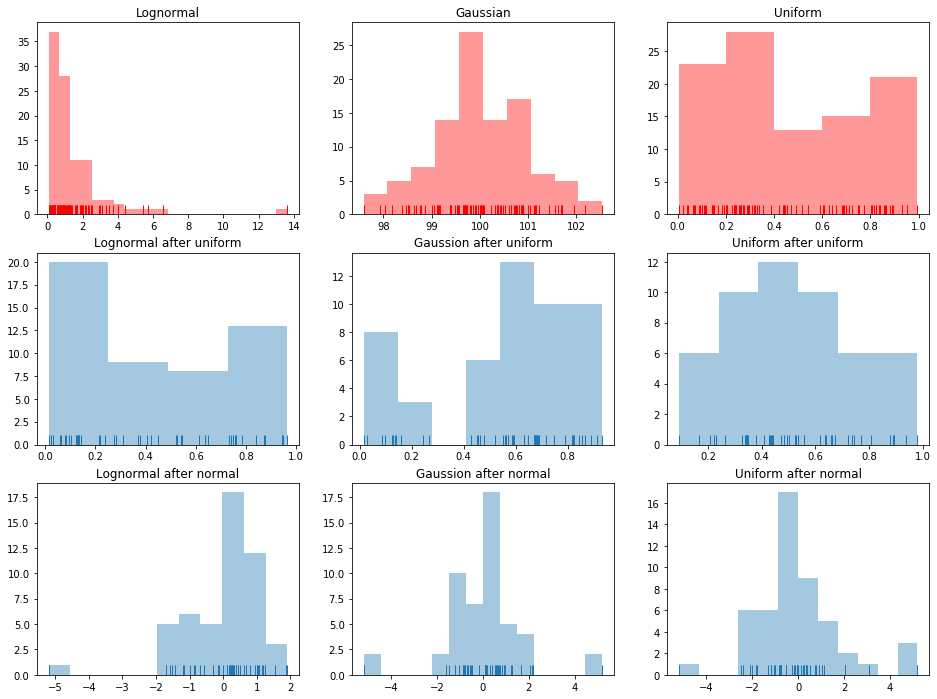

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

# 设置特定参数
N_SAMPLES = 100
size = (N_SAMPLES)
# 初始化随机数发生器
rng = np.random.RandomState(304)
# 生成lognormal分布
X_lognormal = rng.lognormal(size = size)
# 生成高斯分布
loc = 100
X_gaussian = rng.normal(loc = loc, size = size)
# 生成均匀分布
X_uniform = rng.uniform(low = 0, high = 1, size = size)

# 将要展示的分布数据
distributions = [
    ('Lognormal', X_lognormal),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Lognormal after uniform', []),
    ('Gaussion after uniform', []),
    ('Uniform after uniform', []),
    ('Lognormal after normal', []),
    ('Gaussion after normal', []),
    ('Uniform after normal', [])
]

# 图表初始化
f, ax = plt.subplots(ncols=3, nrows=3, figsize=(16,12))
# 开始画图
for i, d in enumerate(distributions):
    # 配置图位置坐标信息
    a = int(np.float(i/3))
    b = np.mod(i, 3)  # 返回除法的余数
    title, data = d
    # 绘制原始数据图表
    if data != []:
        sns.distplot(data, kde=False, rug=True, ax=ax[a,b], color='r')  # ax 表示图的位置
        ax[a, b].set_title(title)
    # 绘制经过分位数处理之后的图表
    else:
        _, data = distributions[b]
        X_train, X_test = train_test_split(data, test_size=0.5)
        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)
        # 分位数分布中，可以采用两种分布策略，均匀分布和正态分布
        strategy = title.split() [2]
        show_data = QuantileTransformer(output_distribution=strategy, random_state=rng).fit(X_train).transform(X_test)
        sns.distplot(show_data, kde=False, rug=True, ax=ax[a, b])
        ax[a, b].set_title(title)
# 图表展示
plt.show()

### 4.4.3 幂变换
使数据更接近正态分布，提高关联度量的有效性。

Box-Cox变换

1. 用于连续响应变量不满足正态分布的情况
2. 引入一个参数，通过数据本身估计该参数，进而确定应采取的数据变换形式
3. x需为正数

Yeo-Johnson变换

1. Box-Cox变换的一种拓展
2. 解决了x必须为正的严格限制

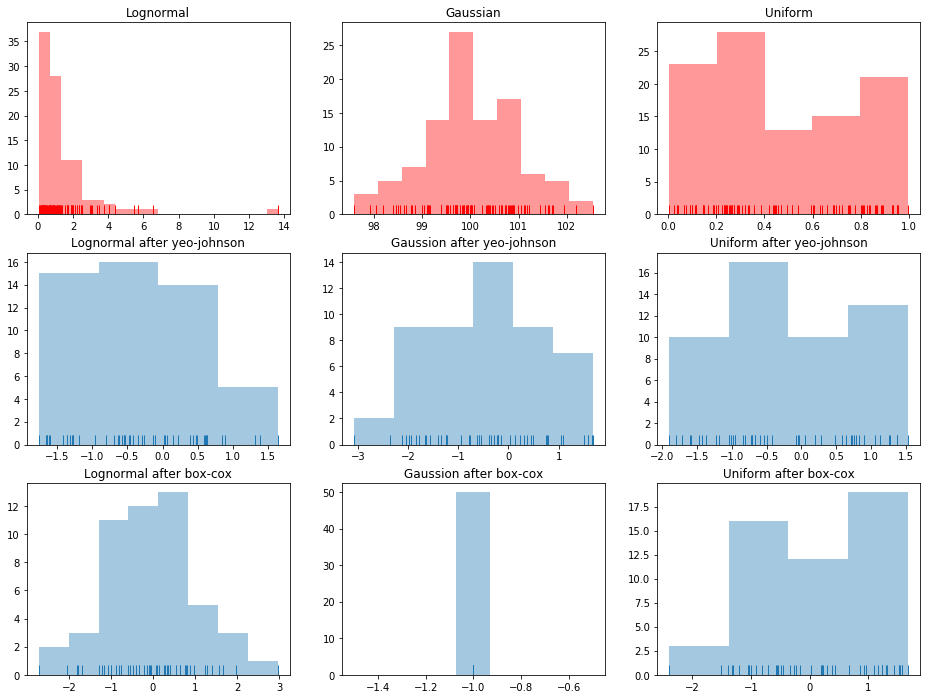

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

# 设置特定参数
N_SAMPLES = 100
size = (N_SAMPLES)
# 初始化随机数发生器
rng = np.random.RandomState(304)
# 生成lognormal分布
X_lognormal = rng.lognormal(size = size)
# 生成高斯分布
loc = 100
X_gaussian = rng.normal(loc = loc, size = size)
# 生成均匀分布
X_uniform = rng.uniform(low = 0, high = 1, size = size)

# 将要展示的分布数据
distributions = [
    ('Lognormal', X_lognormal),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Lognormal after yeo-johnson', []),
    ('Gaussion after yeo-johnson', []),
    ('Uniform after yeo-johnson', []),
    ('Lognormal after box-cox', []),
    ('Gaussion after box-cox', []),
    ('Uniform after box-cox', [])
]

# 图表初始化
f, ax = plt.subplots(ncols=3, nrows=3, figsize=(16,12))
# 开始画图
for i, d in enumerate(distributions):
    # 配置图位置坐标信息
    a = int(np.float(i/3))
    b = np.mod(i, 3)  # 返回除法的余数
    title, data = d
    # 绘制原始数据图表
    if data != []:
        sns.distplot(data, kde=False, rug=True, ax=ax[a,b], color='r')  # ax 表示图的位置
        ax[a, b].set_title(title)
    # 绘制经过分位数处理之后的图表
    else:
        _, data = distributions[b]
        X_train, X_test = train_test_split(data, test_size=0.5)
        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)
        # PowerTransformer
        strategy = title.split() [2]
        show_data = PowerTransformer(method=strategy).fit(X_train).transform(X_test)
        sns.distplot(show_data, kde=False, rug=True, ax=ax[a, b])
        ax[a, b].set_title(title)
# 图表展示
plt.show()

### 4.4.4 多项式变换
1. Polynomial Transformation
2. 用于线性回归场景，本质是一种升维操作

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3,2)
print(X)

# 初始化，degree默认的次数项为2，interaction_only默认为False，常数项include_bias默认为True
# (x1, x2)转换为（1, x1, x2, x1^2, x2^2, x1*x2）
poly = PolynomialFeatures()
print(poly.fit_transform(X))

# (x1, x2)转换为（1, x1, x2, x1*x2）
poly = PolynomialFeatures(degree=3, interaction_only=True)
print(poly.fit_transform(X))

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


## 4.5 自定义预处理

在sklearn的框架下，自定义函数进行处理。

In [7]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

def customer_function(x):
    return x*x-2*x+1


transformer = FunctionTransformer(customer_function, validate=True)

X = np.array([[0,1], [2,3]])
print(transformer.transform(X))

[[1 0]
 [1 4]]


## 4.6 非结构性数据预处理
## 4.7 文本数据预处理
### 4.7.1 分词技术


In [10]:
# encoding=utf-8
import jieba


seg_list = jieba.cut(u'机器学习从入门到入职', cut_all=True)
print(",".join(seg_list))
print(jieba.lcut(u'从机器学习入门到入职'))

机器,学习,从,入门,到,入,职
['从', '机器', '学习', '入门', '到', '入职']


### 4.7.2 对已提取数据的处理

**独热编码**
- One-Hot Encoding
- 用等同于状态数量的位数或者维度进行编码
- 升维

In [2]:
from sklearn.feature_extraction import DictVectorizer

city_dict = [{'city':'beijing'}, {'city':'wuhan'}, {'city':'shenzhen'}]
vec = DictVectorizer()
print(vec.fit_transform(city_dict).toarray())

# 用之前的向量化器转化，存在之前没有存在的词汇时，所有的列都将置为0
city_dict_new = [{'city':'wuhan'}, {'city':'shanghai'}, {'city':'beijing'}]
print(vec.transform(city_dict_new).toarray())

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 0. 0.]
 [1. 0. 0.]]


**哈希技巧**
- Hashing Trick
- 压缩（降维）
### 4.7.3 文本的特征提取
## 4.8 图形的特征提取

In [8]:
import numpy as np
from sklearn.feature_extraction import image


one_image = np.arange(3*3*3).reshape((3,3,3))
print(one_image)
print('图片的黄色通道：')
print(one_image[:,:,1])

patches = image.extract_patches_2d(one_image, (2,2), max_patches=4, random_state=0)
print('-----------')
print(patches)
print('2*2补丁图片的黄色通道')
print(patches[:,:,:,1])

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
图片的黄色通道：
[[ 1  4  7]
 [10 13 16]
 [19 22 25]]
-----------
[[[[ 3  4  5]
   [ 6  7  8]]

  [[12 13 14]
   [15 16 17]]]


 [[[12 13 14]
   [15 16 17]]

  [[21 22 23]
   [24 25 26]]]


 [[[12 13 14]
   [15 16 17]]

  [[21 22 23]
   [24 25 26]]]


 [[[ 3  4  5]
   [ 6  7  8]]

  [[12 13 14]
   [15 16 17]]]]
2*2补丁图片的黄色通道
[[[ 4  7]
  [13 16]]

 [[13 16]
  [22 25]]

 [[13 16]
  [22 25]]

 [[ 4  7]
  [13 16]]]
